# Baysian Optimization

## History and Motivation
<br>
Baysian statistics is a subset of statistics that flips the interpretation of probability.  It was developed by Thomas Bayes in 1763, where he ponders the question of conditional probability (if one fact is know, whats are the odds of a future event). Classically probability considers probability to be the frequency that events occur while Baysian probability has come to represent not a frequency, but a degree of belief in an event occuring.  This is a nuanced and important distinction that allows for powerful insights and methods.  Together we will build up our understanding on Baysian statistics and look at one of these exciting methods called Baysian optimization.

## Bayes Rule
<br>
Bayes Rule is the concept of getting the probability of an event given prior knowledge of the events / conditions that inform the outcome. The rule can be mathmatically written as follows : <br>


$${P(A | B)} = \frac{P(B | A) * P(A)}{P(B)}$$

* A, B	=	events
* P(A|B)	=	probability of A given B is true
* P(B|A)	=	probability of B given A is true
* P(A), P(B)	=	the independent probabilities of A and B

## An Example
<br>
How can we apply and understand this rule.  Let's look at some practical applications of the rule.  One of the most common examples is in the medical setting regarding testing for illness.  If one supposes that there is a medical test that will correctly report a positive case 80% if you have the illness.  However, if you are not sick, that same test has a 30% chance of still reporting a positive case.  Now consider a population that has 500 sick individuals and 2000 healthy individuals.  Bayes rules lets us generate a number that says given you have a positive from this test, what are the odds (belief) you are sick.  Lets apply the formula below:


<br>

* A, B	=	Sick, positive 
* P(A|B)	=	probability you are sick given a positive (undefined)
* P(B|A)	=	probability you are positive given sick (.8)
* P(A), P(B)	=	net probabilities you are sick, net probability of a positive (500/2500) , (500*.8+2000*.3)
<br>

applying this rule : 
<br>
$${P(A | B)} = \frac{P(B | A) * P(A)}{P(B)}$$
$${P(A | B) = .4} = \frac{.8 * 500/2500}{500/2500*.8+2000/2500*.3}$$
<br>
So there is a 40% chance that if you recieve a positive test you are actually sick. This seems counter intuitive in that you got a postive result saying you are sick.  However, baye's rule factors in the idea that the population and the general amount of error in the test actually make it more likely that your are healthy and recieve a false positve because there are far more healthy people than there are sick ones.  Therefore, it is about weighing the proportions of the health and sick against the how well the test preforms. 

## Tree Diagram

<br>
Another way to visually understand the rule is to look at a tree diagram.  This intuitively helps show how the probability partitions

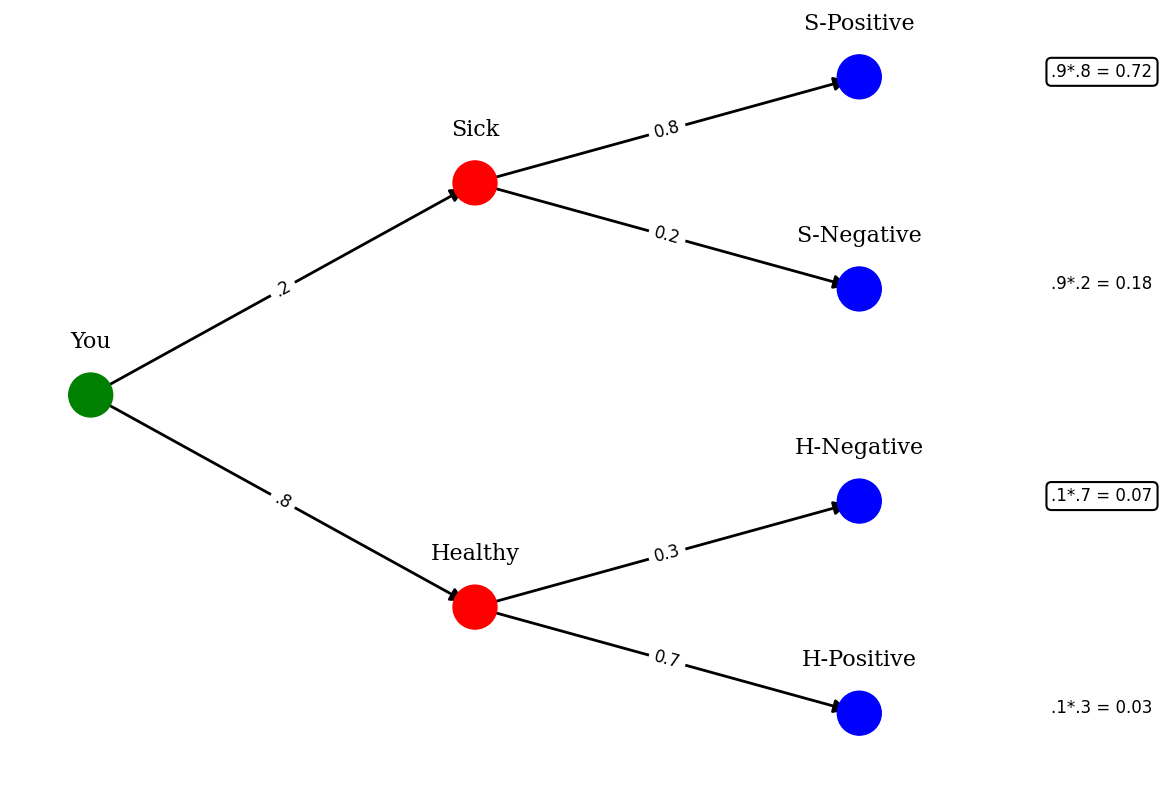

Given that we detected a defect, what are the odds that the bulb is Standard :
We now know that we just normalize the 2 situations this occurs or .0675/(.0675+.0188) or 78.22%


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(12, 10))
# Define the probabilities
probabilities = ["Sick 1/5", "Healthy 4/5", "Positive .8", "Negative .2", "Positive .7", "Negative .3"]

# Create the graph object
G = nx.DiGraph()

# Add the nodes and set their attributes
G.add_node("You", color="green")
G.add_node("Sick", color="red")
G.add_node("Healthy", color="red")
G.add_node("S-Positive", color="blue")
G.add_node("S-Negative", color="blue")
G.add_node("H-Positive", color="blue")
G.add_node("H-Negative", color="blue")

# Add the edges and set their attributes
G.add_edge("You", "Sick", weight=0.5, label=".2")
G.add_edge("You", "Healthy", weight=0.5, label=".8")
G.add_edge("Sick", "S-Positive", weight=0.5, label="0.8")
G.add_edge("Sick", "S-Negative", weight=0.5, label="0.2")
G.add_edge("Healthy", "H-Positive", weight=0.5, label="0.7")
G.add_edge("Healthy", "H-Negative", weight=0.5, label="0.3")

# Set the node positions and colors
pos = {
    "You": (0, 0),
    "Sick": (2, 2),
    "Healthy": (2, -2),
    "S-Positive": (4, 3),
    "S-Negative": (4, 1),
    "H-Positive": (4, -3),
    "H-Negative": (4, -1)
}
colors = ["green", "red", "red", "blue", "blue", "blue", "blue"]

# Draw the nodes and edges
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=1000)
nx.draw_networkx_edges(G, pos, width=2, arrowstyle="-|>", arrowsize=20, edge_color="black")

# Draw the node labels
#nx.draw_networkx_labels(G, pos, font_size=16, font_family="sans-serif", font_weight="bold")

# Draw the edge labels
labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12, font_family="sans-serif")
l_pos = {k: [v[0], v[1] + 0.5] for k, v in pos.items()}
nx.draw_networkx_labels(G, l_pos, font_size=16, font_family='serif',verticalalignment="center")
# Add labels after the detected and non-detected nodes
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1.5)
plt.text(pos['S-Positive'][0]+1, pos['S-Positive'][1], f'.9*.8 = {round(.9*.8,4)}', fontsize=12,bbox=bbox_props)
plt.text(pos['S-Negative'][0]+1, pos['S-Negative'][1], f'.9*.2 = {round(.9*.2,4)}', fontsize=12)
plt.text(pos['H-Positive'][0]+1, pos['H-Positive'][1], f'.1*.3 = {round(.1*.3,4)}', fontsize=12)
plt.text(pos['H-Negative'][0]+1, pos['H-Negative'][1], f'.1*.7 = {round(.1*.7,4)}', fontsize=12,bbox=bbox_props)

plt.axis('off')
plt.show()
print("Given that we detected a defect, what are the odds that the bulb is Standard :")
print(f"We now know that we just normalize the 2 situations this occurs or .0675/(.0675+.0188) or {round(.0675/(.0675+.0188)*100,2)}%")


<br>Looking at this figure, it becomes clear the the probability of an "combined" event is the probability of one x other, ie 4/5 * 7/10 is the probability of one and the other occuring.  Because we limit ourself to the idea that the result is positive, you just need to normalize the situations where positive is one of the joint outcomes, here sick positive and healthy positive.  This gives the odds that given positive that you are sick.  Therefore, Bayes rule can be seen as partitioning the probabilities of events given some condition

## Problem 1

On a game show, a contestant can select one of four boxes. 
 * A red box contains one $100 bill and nine $1 bills.
 * A green box contains two $100 bills and eight $1 bills.
 * A blue box contains three $100 bills and seven $1 bills. 
 * A yellow box contains five $100 bills and five $1 bills.

 <br>
  The contestant selects a box at random and selects a bill from the box at random. If a $100 bill is selected, find the probability that it came from the yellow box.

In [ ]:
# Calculate Solution Here

(Solution) 
For each box the probabilities of selection given 100 is selected is as follow -
- .025
- .05
- .075
-  .125

(normalize .125 / (.025+.05+.075+.125)) = .4545


## Extending Bayes Rule

We can further extend Bayes Rule by adding another condition to the problem.  This will have the effect of extending the conditional to be given via 2 aspects.  This makes the ideas and results more useful in more general cases.  This also helps to partition the 

Suppose a factory produces light bulbs, which are either "Standard" or "Premium". 90% of the bulbs produced are Standard and the remaining 10% are Premium. Defective bulbs are produced 10% of the time for Standard bulbs and 25% of the time for Premium bulbs.

Suppose a bulb is selected at random and tested. If the bulb is not defective, there is a 10% chance that it will be incorrectly marked as defective. On the other hand, if a bulb is defective, there is a 75% chance that it will be correctly identified as such.

Let's find the odds that the given the bulb is defective and we detect it, what is the chance it is a standard bulb?

$$P(A | B) = \frac{P(B | A) * P(A)}{P(B | A) * P(A) + P(B | \neg A) * P(\neg A)}$$

Where:

* $P(A | B)$ is the probability that the bulb is Standard given that it is Defective and Detected
* $P(B | A)$ is the probability that the bulb is Defective and Detected given that it is Standard 
* $P(A)$ is the prior probability that the bulb is Standard 
* $P(B | \neg A)$ is the probability that the bulb is Defective and Detected given that it is not Standard (Premium) 
* $P(\neg A)$ is the prior probability that the bulb is not Standard (Premium) 

Note that now B is a 2 stage condition where the independence allows for partitioning


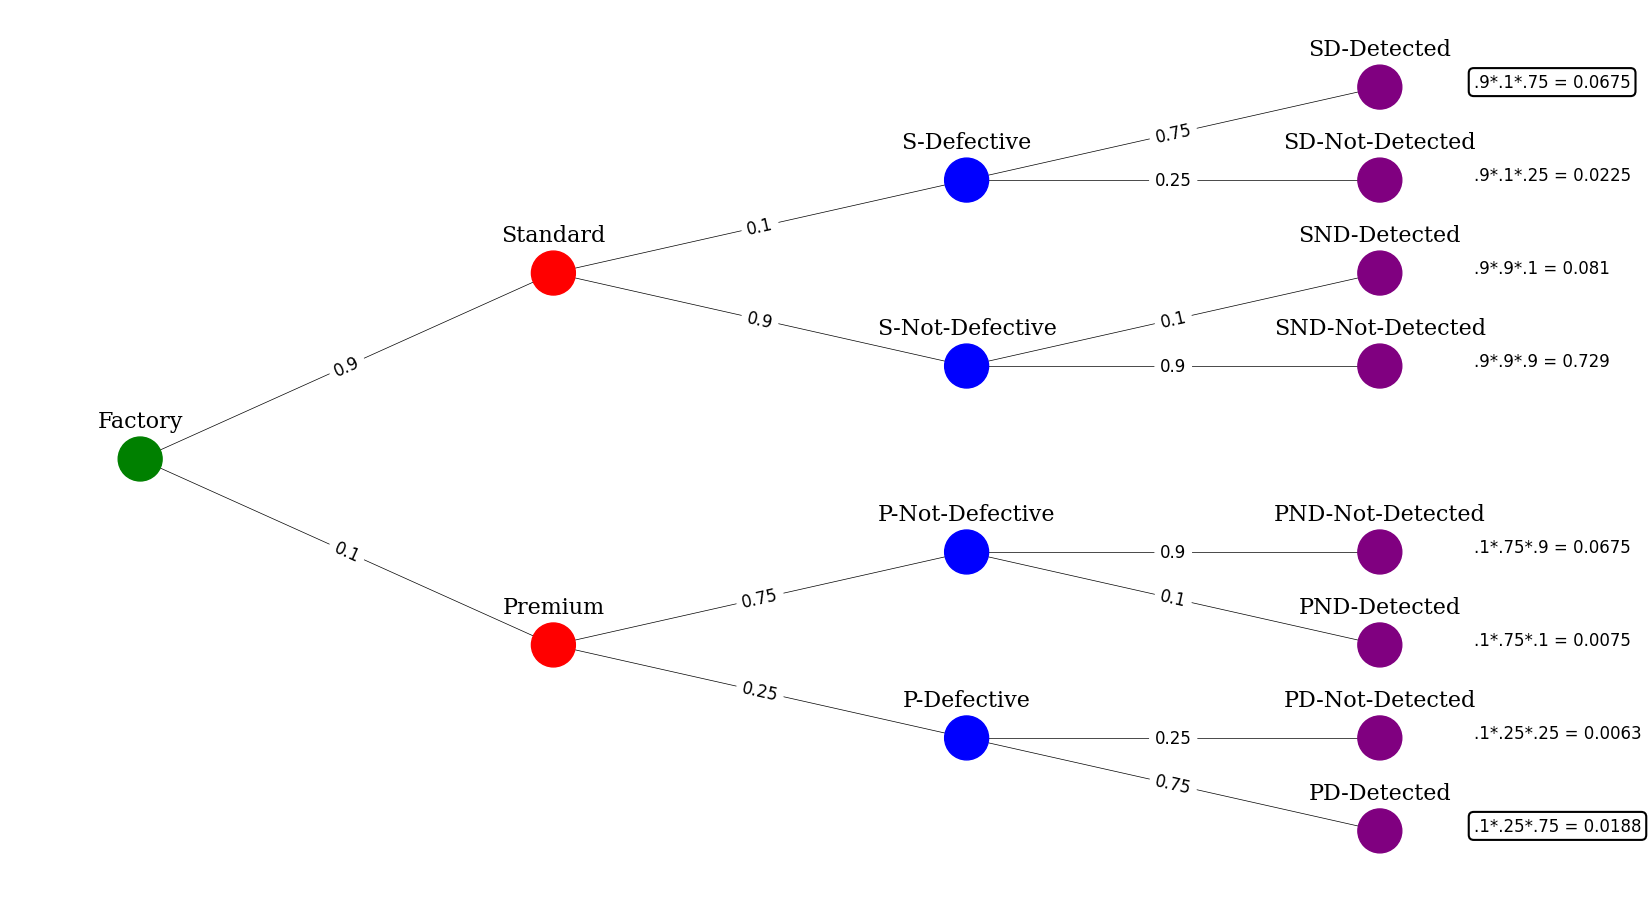

Given that we detected a defect, what are the odds that the bulb is Standard :
We now know that we just normalize the 2 situations this occurs or .0675/(.0675+.0188) or 78.22%


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()

# Add nodes and set their attributes
G.add_node("Factory",color="green")
G.add_node('Standard', color='red')
G.add_node('Premium', color='red')
G.add_node('S-Defective', color='blue')
G.add_node('S-Not-Defective', color='blue')
G.add_node('P-Defective', color='blue')
G.add_node('P-Not-Defective', color='blue')
G.add_node('SD-Detected', color='purple')
G.add_node('SD-Not-Detected', color='purple')
G.add_node('SND-Detected', color='purple')
G.add_node('SND-Not-Detected', color='purple')
G.add_node('PD-Detected', color='purple')
G.add_node('PD-Not-Detected', color='purple')
G.add_node('PND-Detected', color='purple')
G.add_node('PND-Not-Detected', color='purple')

# Add edges and set their attributes
G.add_edge('Factory', 'Standard', weight=.5)
G.add_edge('Factory', 'Premium', weight=.5)
G.add_edge('Standard', 'S-Defective', weight=.5)
G.add_edge('Standard', 'S-Not-Defective', weight=.5)
G.add_edge('Premium', 'P-Defective', weight=.5)
G.add_edge('Premium', 'P-Not-Defective', weight=.5)
G.add_edge('S-Defective', 'SD-Detected', weight=.5)
G.add_edge('S-Defective', 'SD-Not-Detected', weight=.5)
G.add_edge('S-Not-Defective', 'SND-Detected', weight=.5)
G.add_edge('S-Not-Defective', 'SND-Not-Detected', weight=.5)
G.add_edge('P-Defective', 'PD-Detected', weight=.5)
G.add_edge('P-Defective', 'PD-Not-Detected', weight=.5)
G.add_edge('P-Not-Defective', 'PND-Detected', weight=.5)
G.add_edge('P-Not-Defective', 'PND-Not-Detected', weight=.5)

# Set node positions and draw the network
pos = {
    "Factory" : [0, 0],
    'Standard': [2, 2],
    'Premium': [2, -2],
    'S-Defective': [4, 3],
    'S-Not-Defective': [4, 1],
    'P-Defective': [4, -3],
    'P-Not-Defective': [4, -1],    
    'SD-Detected': [6, 4],
    'SD-Not-Detected': [6, 3],
    'SND-Detected': [6, 2],
    'SND-Not-Detected': [6, 1],
    'PD-Detected': [6, -4],
    'PD-Not-Detected': [6, -3],
    'PND-Detected': [6, -2],
    'PND-Not-Detected': [6, -1],
}

node_colors = nx.get_node_attributes(G, 'color').values()
edge_weights = nx.get_edge_attributes(G, 'weight').values()
pos = {k: [v[0]*1.1, v[1]*1.1] for k, v in pos.items()}
l_pos = {k: [v[0], v[1] + 0.45] for k, v in pos.items()}
plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1000)
nx.draw_networkx_edges(G, pos, width=list(edge_weights), edge_color='black')
nx.draw_networkx_labels(G, l_pos, font_size=16, font_family='serif',verticalalignment="center")
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.15, right=1.4)
# Define the edge labels
edge_labels = {
    ('Factory', 'Standard'): '0.9',
    ('Factory', 'Premium'): '0.1',
    ('Standard', 'S-Defective'): '0.1',
    ('Standard', 'S-Not-Defective'): '0.9',
    ('Premium', 'P-Defective'): '0.25',
    ('Premium', 'P-Not-Defective'): '0.75',
    ('S-Defective', 'SD-Detected'): '0.75',
    ('S-Defective', 'SD-Not-Detected'): '0.25',
    ('S-Not-Defective', 'SND-Detected'): '0.1',
    ('S-Not-Defective', 'SND-Not-Detected'): '0.9',
    ('P-Defective', 'PD-Detected'): '0.75',
    ('P-Defective', 'PD-Not-Detected'): '0.25',
    ('P-Not-Defective', 'PND-Detected'): '0.1',
    ('P-Not-Defective', 'PND-Not-Detected'): '0.9',
}

# Draw the edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)
# Add labels after the detected and non-detected nodes
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1.5)
plt.text(pos['SD-Detected'][0]+0.5, pos['SD-Detected'][1], f'.9*.1*.75 = {round(.9*.1*.75,4)}', fontsize=12,bbox=bbox_props)
plt.text(pos['SD-Not-Detected'][0]+0.5, pos['SD-Not-Detected'][1], f'.9*.1*.25 = {round(.9*.1*.25,4)}', fontsize=12)
plt.text(pos['SND-Detected'][0]+0.5, pos['SND-Detected'][1], f'.9*.9*.1 = {round(.9*.9*.1,4)}', fontsize=12)
plt.text(pos['SND-Not-Detected'][0]+0.5, pos['SND-Not-Detected'][1], f'.9*.9*.9 = {round(.9*.9*.9,4)}', fontsize=12)
plt.text(pos['PD-Detected'][0]+0.5, pos['PD-Detected'][1], f'.1*.25*.75 = {round(.1*.25*.75,4)}', fontsize=12,bbox=bbox_props)
plt.text(pos['PD-Not-Detected'][0]+0.5, pos['PD-Not-Detected'][1], f'.1*.25*.25 = {round(.1*.25*.25,4)}', fontsize=12)
plt.text(pos['PND-Detected'][0]+0.5, pos['PND-Detected'][1], f'.1*.75*.1 = {round(.1*.75*.1,4)}', fontsize=12)
plt.text(pos['PND-Not-Detected'][0]+0.5, pos['PND-Not-Detected'][1], f'.1*.75*.9 = {round(.1*.75*.9,4)}', fontsize=12)

plt.axis('off')
plt.show()
print("Given that we detected a defect, what are the odds that the bulb is Standard :")
print(f"We now know that we just normalize the 2 situations this occurs or .0675/(.0675+.0188) or {round(.0675/(.0675+.0188)*100,2)}%")

## Talk on Baysian extensions (networks, uses, more applications) 

Now that we have understood the heart of bayes rule in the simpliest cases, we can look at how it has been extended to more complex and powerful tools.  Below are some examples with a brief summary.

* Naïve Bayes is a probabilistic machine learning algorithm that uses Bayes' theorem to calculate the probability of a class label given a set of input features. It assumes that the input features are independent of each other, which simplifies the calculation of the likelihood. The algorithm is trained on a labeled dataset, where it calculates the prior probability and the likelihood of each feature for each class label. The joint probability of the input features and each class label is then calculated and normalized to assign the input to the class label with the highest probability. Naïve Bayes is widely used in natural language processing, image classification, and other domains where there are a large number of features.

* A Bayesian network is a probabilistic graphical model that represents a set of variables and their conditional dependencies using a directed acyclic graph. Each node in the graph represents a variable, and the directed edges between nodes represent the dependencies between variables. The conditional dependencies between variables are represented using conditional probability tables, which specify the probability of a variable given the values of its parent variables. Bayesian networks are widely used in machine learning and artificial intelligence for probabilistic reasoning, decision-making, and prediction. They are particularly useful in situations where the data is incomplete or uncertain, and they can be used for a wide range of applications, including medical diagnosis, natural language processing, and image recognition.

* Bayesian belief networks extend the idea of Bayesian networks by allowing for cycles in the graph, which enables them to model feedback loops and other types of dependencies that cannot be represented using a directed acyclic graph. Bayesian belief networks are widely used in decision-making and risk analysis, and they have applications in fields such as finance, engineering, and environmental science.

This is all to say the rule can be used generally to build up and make some very powerful models.  

## Baysian Optimization

Now we come to the heart of the notebook, Baysian Optimization which focuses on extending the rule to optimize algorithms that are hard to evaluate.  It uses a probabilistic model of the objective function to guide the search for the optimal set of input parameters. The algorithm iteratively samples input parameters and updates the probabilistic model to predict the next best set of parameters to evaluate, until the optimal set of input parameters is found. Bayesian optimization is widely used in machine learning and other domains for hyperparameter tuning and experimental design.

Before we can fully understand Baysian Optimization, we need to understand the idea of a Gaussian Process.  A Gaussian Process is a collection of random variables, any finite number of which have a joint Gaussian distribution.  This means that the joint distribution of any finite number of variables is multivariate normal.  This is a very powerful tool because it allows us to model a function as a collection of random variables.  This is useful because we can then use the Gaussian Process to model the objective function that we are trying to optimize.  This is the heart of Baysian Optimization.

### Gaussian Process

A Gaussian process is a stochastic process with a Gaussian distribution. It is a generalization of the multivariate normal distribution to infinite dimensions. A Gaussian process is fully specified by its mean function and covariance function. The mean function is a function that maps each input point to a real number, and the covariance function is a function that maps two input points to a real number. The covariance function specifies the covariance between the outputs of the Gaussian process at the two input points. The covariance function is also known as the kernel function, and it is used to define the smoothness of the Gaussian process. The mean function and covariance function are often chosen to be linear combinations of a set of basis functions, which are also known as kernels. The Gaussian process is then defined as:

$y \sim \mathcal{GP}(m(x), k(x, x'))$

where $y$ is the output of the Gaussian process, $m(x)$ is the mean function, and $k(x, x')$ is the covariance function. The Gaussian process is fully specified by the mean function and covariance function, and the Gaussian process is represented by a multivariate normal distribution with mean $m(x)$ and covariance $k(x, x')$.

The functions that a GP uses to model the objective function are called kernels.  The kernel is a function that takes two inputs and returns a scalar.  The kernel is used to define the smoothness of the GP.  The most common kernel is the squared exponential kernel. The squared exponential kernel is defined as:

$k(x, x') = \sigma^2 \exp\left(-\frac{\|x - x'\|^2}{2\ell^2}\right)$

where $\sigma^2$ is the variance, $\ell$ is the length scale, and $\|x - x'\|$ is the Euclidean distance between $x$ and $x'$. The squared exponential kernel is also known as the radial basis function kernel, and it is a popular choice for the covariance function in Gaussian processes. The squared exponential kernel is a stationary kernel, which means that the covariance between two points is independent of the distance between them. 

In a Gaussian process (GP), the covariance matrix encodes the correlations between function values at different input locations. Specifically, given a set of input locations $\mathbf{X} = [\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_n]^T$, the covariance matrix $\mathbf{K}$ is defined as:

​
$\mathbf{K} = \begin{bmatrix}
    k(\mathbf{x}_1, \mathbf{x}_1) & k(\mathbf{x}_1, \mathbf{x}_2) & \cdots & k(\mathbf{x}_1, \mathbf{x}_n) \\
    k(\mathbf{x}_2, \mathbf{x}_1) & k(\mathbf{x}_2, \mathbf{x}_2) & \cdots & k(\mathbf{x}_2, \mathbf{x}_n) \\
    \vdots & \vdots & \ddots & \vdots \\
    k(\mathbf{x}_n, \mathbf{x}_1) & k(\mathbf{x}_n, \mathbf{x}_2) & \cdots & k(\mathbf{x}_n, \mathbf{x}_n)
\end{bmatrix}$
 
where $k(\mathbf{x}_i, \mathbf{x}_j)$ is the kernel function evaluated at input locations $\mathbf{x}_i$ and $\mathbf{x}_j$. The diagonal elements $k(\mathbf{x}_i, \mathbf{x}_i)$ represent the variance of the GP at each input location, while the off-diagonal elements represent the covariance between function values at different input locations.

During prediction, given a set of new input locations $\mathbf{X}*$, the GP predicts the corresponding function values $\mathbf{f}$ as a multivariate Gaussian distribution with mean U and covariance matrix $\mathbf{K}_*$, where:

$
\begin{aligned}
    \boldsymbol{\mu}_* &= \mathbf{k}_*^T \mathbf{K}^{-1} \mathbf{y} \\
    \mathbf{K}_* &= k(\mathbf{X}_*, \mathbf{X}_*) - \mathbf{k}_*^T \mathbf{K}^{-1} \mathbf{k}_*
\end{aligned}
$
​
 
​
 
where $\mathbf{y}$ is a vector of observed function values, $\mathbf{k}* = [k(\mathbf{x}1, \mathbf{x}), k(\mathbf{x}2, \mathbf{x}), \ldots, k(\mathbf{x}n, \mathbf{x}*)]^T$ is a vector of kernel evaluations between the observed input locations $\mathbf{X}$ and the new input locations $\mathbf{X}$, and $k(\mathbf{X}_, \mathbf{X}*)$ is the kernel matrix evaluated at the new input locations. The covariance matrix $\mathbf{K}*$ represents the uncertainty in the predicted function values at the new input locations.


### Acquisition Function

The acquisition function is a function that is used to determine the next set of parameters to evalute in the objective function.  The aquisition function measures the added benefit of each point in the space and selects the next best one.  How best is determined depends on what the aquisition function is.  This is often balancing the trade off between exploring the space and also exploiting the current knowledge of the objective function.  The most common aquisition function is the Expected Improvement (EI) function.  The EI function is defined as:

Intuitively 

1. Upper Confidence Bound (UCB): The UCB acquisition function balances exploration and exploitation by maximizing the expected improvement of the function, while taking into account the uncertainty of the model predictions. The trade-off parameter $\beta_n$ controls the balance between exploration and exploitation, with higher values of $\beta_n$ corresponding to more exploration. The UCB acquisition function tends to perform well when the objective function is smooth and unimodal.

2. Expected Improvement (EI): The EI acquisition function directly measures the expected improvement over the current best value of the objective function, and is more focused on exploration. The EI is calculated by computing the expected improvement over the current best value for each point in the search space. Points with higher expected improvement are then considered for the next evaluation. The EI acquisition function tends to perform well when the objective function is noisy and has multiple optima.

3. Probability of Improvement (PI): The PI acquisition function measures the probability of finding a new best value in the search space, and is more focused on exploitation. The PI is calculated by computing the probability that a point in the search space has a higher objective function value than the current best value. Points with higher probability of improvement are then considered for the next evaluation. The PI acquisition function tends to perform well when the objective function has a narrow, well-defined peak.

Math
1. Upper Confidence Bound (UCB): $x_{n+1} = \text{argmax}_{x\in\mathcal{X}} \left( \mu_n(x) + \beta_n \sigma_n(x) \right)$ Where $\mu$ is the mean and $\sigma$ is the standard deviation of the GP at the point $x$.

2. Expected Improvement (EI): $x_{n+1} = \text{argmax}_{x\in\mathcal{X}} \text{EI}_n(x)$, where $\text{EI}_n(x) = \mathbb{E}n\left[\max(0, f(x) - f{\text{best}})\right]$

3. Probability of Improvement (PI): $x_{n+1} = \text{argmax}_{x\in\mathcal{X}} \text{PI}_n(x)$, where $\text{PI}_n(x) = P\left(f(x) > f{\text{best}} - \delta\right)$, and $\delta$ is a small positive constant that controls the trade-off between exploration and exploitation.

(Note that this math becomes more involved depending on the specifics of your GP kernal and what you are optimizing exactly.  However, these equations are best for the general case.)

### How it works
Bayesian optimization is a sequential model-based optimization technique for optimizing expensive-to-evaluate black-box functions. It is particularly useful when the objective function is expensive to evaluate, since it minimizes the number of evaluations needed to find the optimal solution.

The main idea behind Bayesian optimization is to build a surrogate model of the objective function, which is used to select the next point to evaluate. The surrogate model is typically a Gaussian process, which provides a probabilistic model of the objective function and its uncertainty.

The Bayesian optimization loop proceeds as follows:

1. Given a surrogate model $p(y|X)$, where $y$ is the function value and $X$ is the set of evaluated points, select the next point to evaluate $x_{n+1}$ based on an acquisition function $a(x)$ that balances exploration and exploitation. The most common acquisition functions are explored above.

2. Evaluate the objective function $f(x_{n+1})$ at the chosen point $x_{n+1}$.

3. Add the new observation $(x_{n+1}, f(x_{n+1}))$ to the set of evaluated points $X_{n+1} = X_n \cup {(x_{n+1}, f(x_{n+1}))}$.

4. Update the surrogate model $p(y|X_{n+1})$ using Bayesian inference to incorporate the new observation. The posterior distribution of $y$ given $X_{n+1}$ is given by:

    $p(y\mid X_{n+1}) = \frac{p(f(x_{n+1})\mid x_{n+1}, X_n)}{p(f(x_{n+1})\mid x_{n+1}, y, X_n)}\ p(y\mid X_n)$


    where $p(f(x_{n+1})|x_{n+1}, y, X_n)$ is the likelihood of the observation, $p(y|X_n)$ is the prior distribution, and $p(f(x_{n+1})|x_{n+1}, X_n)$ is the evidence.

Repeat steps 1-4 until a termination criterion is met, such as a maximum number of iterations or a convergence threshold.


Bayesian optimization is a powerful and flexible optimization technique that can handle a wide variety of objective functions and constraints. However, it can be computationally expensive and requires careful tuning of the surrogate model and acquisition function to achieve good performance.  

## An example of Baysian Optimization

Lets start by defining a simple objective function to optimize.  This represents a 1-D case of a function or process that we are trying to find the max of.  Generally, we may not be able to know this function, but for the sake of learning we will here.  We will define our (pseudo) black box model as:

$$ y = \sin(5x) + \cos(10x) + 0.5x $$

However this is not exactly realistic, lets add some noise and see what the space looks like

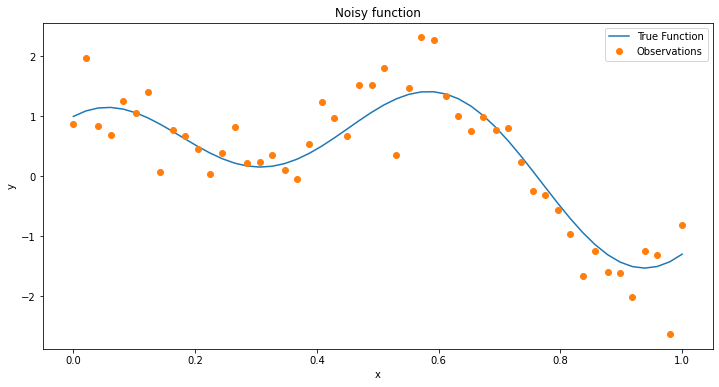

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(45)
def noisy_function(x, noise=1):
    """
    A simple noisy objective function that takes a 1D array x as input.
    """
    noise = noise*np.random.randn(len(x)) # Add some random noise
    y = np.sin(5*x) + np.cos(10*x) + 0.5*x
    y= y + noise
    return y

def plot_function(real, x, y, title=None):
    """
    Plot the function f with the points x and y.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(x, y, label='True Function')
    plt.plot(x, real, 'o', label='Observations')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    if title:
        plt.title(title)
    plt.show()

# Create a noisy dataset
x = np.linspace(0, 1, 50)
y = noisy_function(x,noise=0)
real=noisy_function(x,noise=.5)
plot_function(real, x, y, title='Noisy function')


Now we have an example of a space with what a real world obeservations of data could be for a function.  Let's move to using a GP and trying to see how one would optimize this function.

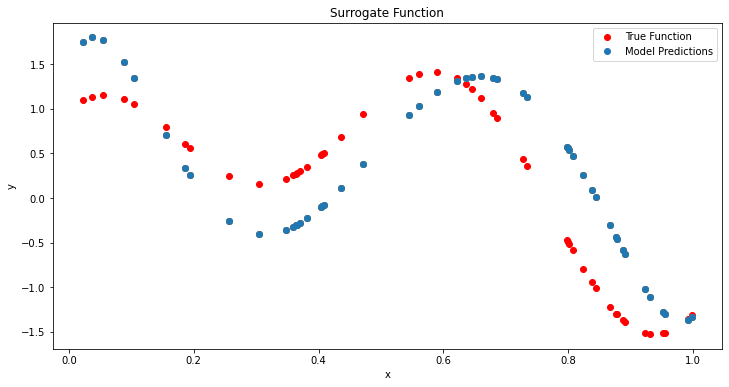

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from warnings import catch_warnings
from warnings import simplefilter

def plot_function_model(real, x, y, title=None):
    """
    Plots a function and its predicted values.

    Parameters:
    ----------
    real : array-like
        The actual values of the function being modeled.
    x : array-like
        The input values used to generate the predictions.
    y : array-like
        The predicted values of the function generated by the model.
    title : str, optional
        The title of the plot.

    Returns:
    -------
    None
    """
    plt.figure(figsize=(12, 6))
    plt.scatter(x, y,c='r', label='True Function')
    plt.plot(x, real, 'o', label='Model Predictions')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    if title:
        plt.title(title)
# Instantiate a Gaussian Process model
gp = GaussianProcessRegressor()
real=noisy_function(np.array(x),noise=2)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(x[:, np.newaxis], real)


# surrogate or approximation for the objective function
def surrogate(model, X):
 # catch any warning generated when making a prediction
    with catch_warnings():
        pass
    # ignore generated warnings
    simplefilter("ignore")
    return model.predict(X, return_std=True)

model_space=np.random.rand(50)

plot_function_model(surrogate(model=gp,X=model_space[:, np.newaxis])[0],model_space,noisy_function(model_space,noise=0),title='Surrogate Function')
a,b=surrogate(model=gp,X=model_space[:, np.newaxis])
plt.scatter(model_space,a+b)
plt.scatter(model_space,a-b)

As one can see, the noise has thrown off the gp slightly from the true shape of the function.  However, it is still able to capture the general shape of the function.  Now lets try to optimize this function using the GP and BO.  We are going to use a random search of the space for simplicity (usually this would be a more complicated algorithm such as BFGS) (This is opt acquisition below).  However, this is just to show how the GP and BO work together.  

In [ ]:
# import norm
from scipy.stats import norm
from numpy import arange
from numpy import argmax
from numpy.random import normal
from numpy.random import random
from numpy import asarray
from numpy import vstack
# probability of improvement acquisition function
def opt_acquisition(X, y, model):
	# random search, generate random samples
	Xsamples = random(50)
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	# calculate the acquisition function for each sample
	scores = acquisition(X, Xsamples, model)
	# locate the index of the largest scores
	ix = argmax(scores)
	return Xsamples[ix, 0]


Now we will use the probability of improvement to optimize the function.  Here this entails taking the cumulative distribution of the P = cdf((mean - the best mean) / std + 1E-9)( add to std to avoid divide by 0 errors).  This will then allow use to sample from the space and find the best point to evaluate next.  This is done below for 100 iterations.  Note that we started with 100 evaluated points to give the GP something to predict on.

In [ ]:
# probability of improvement acquisition function
def acquisition(X, Xsamples, model):
 # calculate the best surrogate score found so far
 yhat, _ = surrogate(model, X)
 best = max(yhat)
 # calculate mean and stdev via surrogate function
 mu, std = surrogate(model, Xsamples)
 #print(mu,std)
 mu = mu[:]
 # calculate the probability of improvement
 probs = norm.cdf((mu - best) / (std+1E-9))
 return probs
X = random(20)
y = asarray(noisy_function(X,noise=1))
# reshape into rows and cols
X = X.reshape(len(X), 1)
# perform the optimization process
for i in range(100):
 # select the next point to sample
 x = opt_acquisition(X, y, gp)
 # sample the point
 actual = noisy_function(np.array([x]))
 # summarize the finding for our own reporting
 est, _ = surrogate(gp, [[x]])
 print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
 # add the data to the dataset
 X = vstack((X, [x]))
 y = np.append(y,actual)
 # update the model
 gp.fit(X, y)

>x=0.042, f()=1.801306, actual=0.416
>x=0.015, f()=2.476273, actual=2.006
>x=0.487, f()=1.309288, actual=0.945
>x=0.010, f()=2.342084, actual=-0.337
>x=0.565, f()=1.621370, actual=-0.127
>x=0.578, f()=1.390795, actual=1.797
>x=0.582, f()=1.441206, actual=1.812
>x=0.564, f()=1.470376, actual=1.122
>x=0.562, f()=1.433932, actual=2.054
>x=0.585, f()=1.502529, actual=2.294
>x=0.596, f()=1.566031, actual=1.671
>x=0.578, f()=1.578257, actual=-0.016
>x=0.584, f()=1.465160, actual=2.537
>x=0.580, f()=1.537415, actual=2.643
>x=0.605, f()=1.596102, actual=0.760
>x=0.608, f()=1.524411, actual=1.871
>x=0.436, f()=0.900741, actual=2.067
>x=0.781, f()=-0.403633, actual=0.579
>x=0.185, f()=-0.143196, actual=0.172
>x=0.918, f()=-3.333128, actual=-1.545
>x=0.616, f()=1.563201, actual=2.393
>x=0.578, f()=1.652354, actual=0.895
>x=0.595, f()=1.617279, actual=2.900
>x=0.590, f()=1.683062, actual=2.616
>x=0.498, f()=1.396433, actual=0.909
>x=0.601, f()=1.721334, actual=2.161
>x=0.591, f()=1.738075, actual=

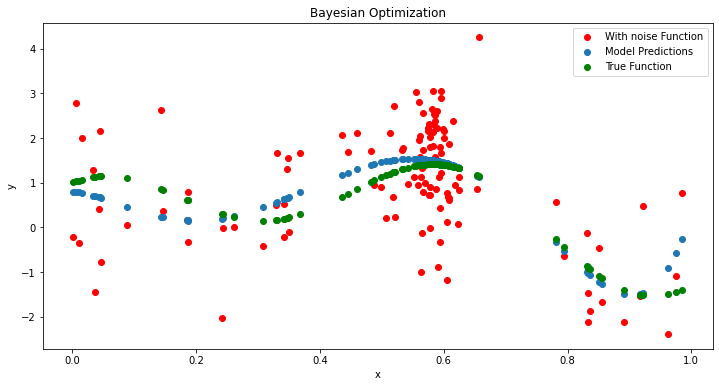

Best Result: x=0.656, y=4.252
Real optimal value is 0.6, y=1.4012902947102333


In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(X,y,c='r', label='With noise Function')
plt.scatter(X,surrogate(gp,X)[0], label='Model Predictions')
plt.scatter(X.flatten(),noisy_function(X.flatten(),noise=0),c='g', label='True Function')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Bayesian Optimization')
plt.show()
ix = argmax(y)
print('Best Result: x=%.3f, y=%.3f' % (X[ix], y[ix]))
print(f"Real optimal value is {.6}, y={noisy_function(np.array([.6]),noise=0)[0]}")

As we can see the noise has once again confounded our y value, but we were able to almost exactly get the optimal.  If we go a step further and average around this point we can get a better estimate of the true optimal.  This is done below.

In [ ]:
X=np.array(X.flatten())
print("Averaged value :", np.mean(y[np.where(X[np.where((X>.57) & (X<.63))])]))

Averaged value : 0.894659832209317


A lot closer to the 1.4, but this is due the stocastic nature of the process.  If more smapling is done, the closer to the true optimal we will get.  Note that above will only sample in the region of interest generally.  This allows us to cut the cost down of evaluating the function.  This is the main benefit of BO.  The combination of the surrogate model and the acquisition function allows us to do this.  The surrogate model allows us to predict the function in the space, and the acquisition function allows us to sample the space in a more intelligent way.  This allows us to find the optimal faster and with less samples.  

## More realistic example

Now that we have covered the basic process of baysian optimization, lets try to apply it to a more realistic example and learn about the types of acquisition functions on the way.  We will use the same process as above, but we will now use a 2D function to represent the land with different diamond diposits.  The function is defined as :

$$y=e^{-\frac{(x-0.2)^2 + (y-0.5)^2}{0.02}} + e^{-\frac{(x-0.5)^2 + (y-0.5)^2}{0.02}} + e^{-\frac{(x-0.8)^2 + (y-0.5)^2}{0.02}}$$

This function is shown below, but generally it can be seen to have multiple peaks and valleys.  This is a more realistic representation of a function that we would want to optimize. 


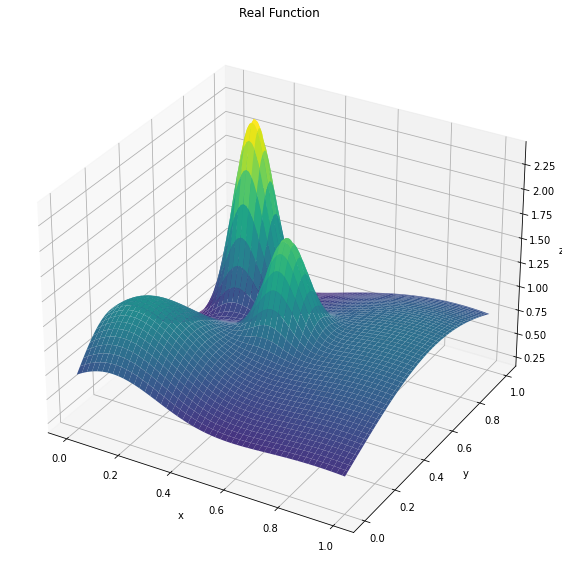

Real optimal value is (x,y) = (0.2, 0.8), value=2.464866295587308


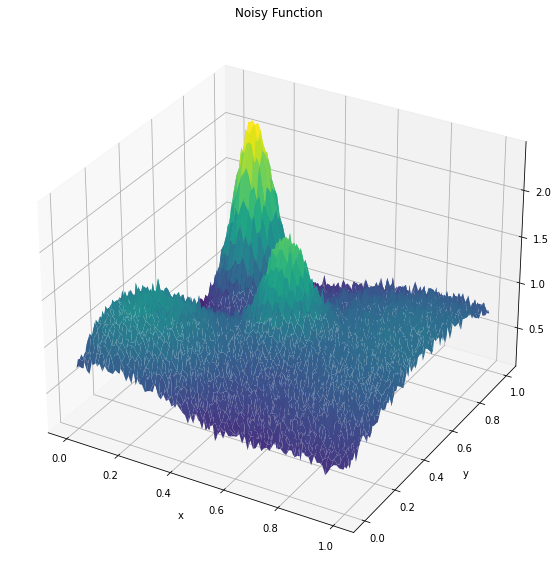

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def noisy_function(x, y, noise=1):
    """
    Generates a 2D noisy function based on given input values x and y.

    Parameters:
    ----------
    x : array-like
        The input values along the x-axis.
    y : array-like
        The input values along the y-axis.
    noise : float, optional
        The level of noise to add to the function. Default is 1.

    Returns:
    -------
    y : array-like
        The output values of the function with added noise.

    Example:
    --------
    >>> x = np.linspace(0, 1, 100)
    >>> y = np.linspace(0, 1, 100)
    >>> noisy = noisy_function(x, y, noise=0.5)
    """
    noise = noise * np.random.randn(len(x),len(y)) # Add some random noise
    x=np.array(x)
    y=np.array(y)
    value =(2*np.exp(-((x-0.2)**2 + (y-0.8)**2)/0.01) + 
             np.exp(-((x-0.5)**2 + (y-0.5)**2)/0.01) +
             np.exp(-((x-0.1)**2 + (y-0.2)**2)/0.09) + 
             np.exp(-((x-0.9)**2 + (y-0.6)**2)/0.6))
    y = value + noise
    return y

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

x = y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

# Evaluate the function at each combination of x and y values
Z = noisy_function(X, Y,noise=0)

# Create a 3D plot of the function
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.title.set_text('Real Function')
plt.show()
Z = noisy_function(X, Y,noise=.05)
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.title.set_text('Noisy Function')
print(f"Real optimal value is (x,y) = {.2,.8}, value={np.max(Z)}")

All we have to do is code up the aquisition functions than follow the general process outlined.  For the purposes of simplicity, the function will use discrete point optimization on the range of 10000 points for our model to choose from.  This is done below.

100%|██████████| 250/250 [00:12<00:00, 20.03it/s]

For UCB
Best x is [0.19191919 0.78787879], best y is 2.694285679714442


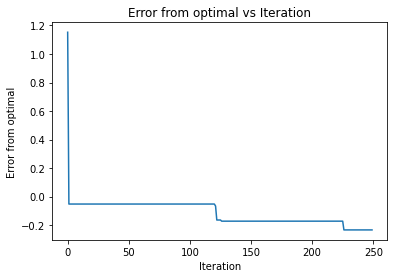

In [ ]:
import numpy as np
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, Matern
from scipy.optimize import minimize
from tqdm import tqdm

def expected_improvement(x, X_sample, Y_sample, gp, xi=0.01):\
    """
    Calculates the expected improvement (EI) at point x, given past samples X_sample
    and Y_sample, and a Gaussian process model gp.

    Parameters:
    ----------
    x : array-like
        The point(s) at which to evaluate the expected improvement.
    X_sample : array-like
        The input values of the previous samples.
    Y_sample : array-like
        The output values of the previous samples.
    gp : GaussianProcessRegressor object
        The Gaussian process regression model fitted to the data.
    xi : float, optional
        The exploration-exploitation trade-off parameter. Default is 0.01.

    Returns:
    -------
    ei : float or array-like
        The expected improvement at the point(s) x.

    """
    mu, sigma = gp.predict(x, return_std=True)
    mu_sample = np.max(Y_sample)
    with np.errstate(divide='warn'):
        imp = mu - mu_sample - xi
        z = imp / sigma
        ei = imp * norm.cdf(z) + sigma * norm.pdf(z)
        ei[sigma == 0.0] = 0.0
    return -ei


def upper_confidence_bound(x, X_sample, Y_sample, gp, kappa=2.576):
    """
    Calculates the upper confidence bound (UCB) at point x, given past samples X_sample
    and Y_sample, and a Gaussian process model gp.

    Parameters:
    ----------
    x : array-like
        The point(s) at which to evaluate the upper confidence bound.
    X_sample : array-like
        The input values of the previous samples.
    Y_sample : array-like
        The output values of the previous samples.
    gp : GaussianProcessRegressor object
        The Gaussian process regression model fitted to the data.
    kappa : float, optional
        The trade-off parameter between exploration and exploitation.
        Default is 2.576, which corresponds to 99% confidence interval.

    Returns:
    -------
    ucb : float or array-like
        The upper confidence bound at the point(s) x.

    """
    mu, sigma = gp.predict(x, return_std=True)
    return -(mu + kappa * sigma)


def probability_of_improvement(x, X_sample, Y_sample, gp):
    """
    Calculates the probability of improvement (POI) at point x, given past samples X_sample
    and Y_sample, and a Gaussian process model gp.

    Parameters:
    ----------
    x : array-like
        The point(s) at which to evaluate the probability of improvement.
    X_sample : array-like
        The input values of the previous samples.
    Y_sample : array-like
        The output values of the previous samples.
    gp : GaussianProcessRegressor object
        The Gaussian process regression model fitted to the data.

    Returns:
    -------
    poi : float or array-like
        The probability of improvement at the point(s) x.

    """

    mu, sigma = gp.predict(x, return_std=True)
    mu_sample = np.max(Y_sample)
    with np.errstate(divide='warn'):
        z = (mu - mu_sample) / sigma
        poi = norm.cdf(z)
        poi[sigma == 0.0] = 0.0
    return -poi


def bayesian_optimization(objective, bounds, n_iterations, acquisition, acquisition_params):
    """
        This function performs Bayesian optimization on an objective function with given bounds, for a specified number of iterations. It uses a Gaussian Process Regressor to model the objective function and selects the next point to sample based on the specified acquisition function (expected improvement, upper confidence bound, or probability of improvement).

    Parameters:
    ----------

    objective: the objective function to optimize
    bounds: an array of shape (n_dims, 2) defining the bounds of the search space
    n_iterations: the number of iterations of Bayesian optimization to perform
    acquisition: the acquisition function to use for selecting the next point to sample (either 'ei', 'ucb', or 'poi')
    acquisition_params: a dictionary containing additional parameters for the acquisition function (e.g. xi for expected improvement)
    
    Returns:
    -------
    
    best_x: the best configuration found by Bayesian optimization
    best_y: the value of the objective function at the best configuration
    X: a list of all sampled configurations
    Y: a list of the corresponding values of the objective function for each sampled configuration
    """
    X = []
    Y = []

    # Initialize samples
    np.random.seed(42)
    x_init = np.random.uniform(bounds[:, 0], bounds[:, 1], size=(100, bounds.shape[0]))
    y_init = [noisy_function([x[0]], [x[1]],noise=0.1)[0][0] for x in x_init]

    X = np.array(x_init)
    Y = y_init

    # Define the kernel and the GP regressor
    gp = GaussianProcessRegressor()
    
    for i in tqdm(range(250)):
        # Update GP model
        gp.fit(X, Y)
        #print(X)
        # Select the next point to sample
        a,b = np.mgrid[0:1:100j, 0:1:100j]
        xy = np.vstack((a.flatten(), b.flatten()))
        xy=xy.T
        x_next = None
        if acquisition == 'ei':
            z=expected_improvement(xy, X, Y, gp)
            x_next=xy[np.argmin(z)]
        elif acquisition == 'ucb':
            z=upper_confidence_bound(xy, X, Y, gp)
            x_next=xy[np.argmin(z)]
        elif acquisition == 'poi':
            z=probability_of_improvement(xy, X, Y, gp)
            x_next=xy[np.argmin(z)]
        #print(x_next)
        # Sample the next point and update samples
        y_next = objective([x_next[0]], [x_next[1]],noise=.1)[0][0]
        X=X.tolist()
        X.append(x_next)
        X=np.array(X)
        Y.append(y_next)
        

    # Obtain the best configuration and its performance
    best_idx = np.argmax(Y)
    best_x = X[best_idx]
    best_y = Y[best_idx]
    return best_x, best_y,X,Y
a,b,c,d=bayesian_optimization(noisy_function, np.array([[0, 1], [0, 1]]), 10, 'ucb', None)
print("For UCB")
print(f"Best x is {a}, best y is {b}")
plt.xlabel("Iteration")
plt.ylabel("Error from optimal")
plt.title("Error from optimal vs Iteration")

plt.plot(range(250),2.46-np.array([np.max(d[100:101+i]) for i in range(250)]))


100%|██████████| 250/250 [00:12<00:00, 19.80it/s]

For POI
Best x is [0.21212121 0.81818182], best y is 2.646888973951309


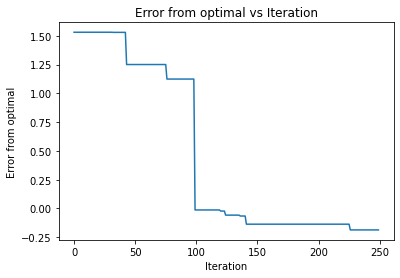

In [ ]:
a,b,c,d=bayesian_optimization(noisy_function, np.array([[0, 1], [0, 1]]), 10, 'poi', None)
print("For POI")
print(f"Best x is {a}, best y is {b}")
plt.xlabel("Iteration")
plt.ylabel("Error from optimal")
plt.title("Error from optimal vs Iteration")
plt.plot(range(250),2.46-np.array([np.max(d[100:101+i]) for i in range(250)]))

100%|██████████| 250/250 [00:12<00:00, 19.48it/s]

For EI
Best x is [0.19191919 0.7979798 ], best y is 2.717369476477992


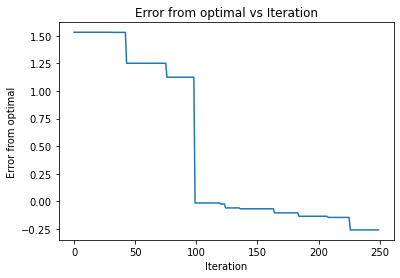

In [ ]:
a,b,c,d=bayesian_optimization(noisy_function, np.array([[0, 1], [0, 1]]), 10, 'ei', None)
print("For EI")
print(f"Best x is {a}, best y is {b}")
plt.xlabel("Iteration")
plt.ylabel("Error from optimal")
plt.title("Error from optimal vs Iteration")
plt.plot(range(250),2.46-np.array([np.max(d[100:101+i]) for i in range(250)]))

So it appaers that all the functions are able to find the optimal of the diamond distribtion.  However, it took significantly less time of upper confidence bound as it found it in the almost first iteration.  The other two required 100 iterations to find the optimal.  It also appears that they had the same learning curve, such that they chose the same points during the iterations.  Going back to our orginal description, this may mean that the function was smooth enough for the UCB to preform the best. 

Sources : 

Agnihotri, Apoorv, and Nipun Batra. “Exploring Bayesian Optimization.” Distill, 23 Sept. 2021, https://distill.pub/2020/bayesian-optimization/. 

Brownlee, Jason. “How to Implement Bayesian Optimization from Scratch in Python.” MachineLearningMastery.com, 21 Aug. 2020, https://machinelearningmastery.com/what-is-bayesian-optimization/. 